#### Module 4, Section 3 of the ATPA SOA Modules - Techniques for Opaque Models

In [2]:
# Chunk 1: Load and view the data.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Load the data
dental = pd.read_csv("Data/dental.csv")

# View data summaries
display(dental.describe)

# Split into test and train sets
dental_train, dental_test = train_test_split(dental, test_size=0.25)


<bound method NDFrame.describe of       Target  age   bmi  familyIncome occupation_group  sex
0        122   36  26.6       68000.0     1 MANAGEMENT    0
1        122   36  21.5       68000.0          5 ADMIN    1
2        420   15  19.6       68000.0          UNKNOWN    1
3        160    8  14.5       68000.0          UNKNOWN    0
4         93    8  18.9       12000.0          UNKNOWN    0
...      ...  ...   ...           ...              ...  ...
6986     142   33  25.3      154000.0     1 MANAGEMENT    0
6987     265   31  28.3      154000.0     1 MANAGEMENT    1
6988     310   82  30.3       64350.0          UNKNOWN    1
6989    6424   70  26.6       36748.0          UNKNOWN    1
6990    3000   75  30.1       36748.0          UNKNOWN    0

[6991 rows x 6 columns]>

In [3]:
# Chunk 2: Fit an ordinary linear model, a GLM, and a random forest to the observations.
    # We are not interested in which is best, only how to explain them.
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

formula = "Target ~ 1 + age + bmi + familyIncome + sex + occupation_group"

# Fit linear regression model
mod_ols = smf.ols(formula,data=dental_train)
ols = mod_ols.fit()
display(ols.summary())

# Fit glm, Gaussian with log link
mod_glm = smf.glm(formula,data=dental_train,family = sm.families.Gaussian(sm.families.links.log()))
glm = mod_glm.fit()
display(glm.summary())


from sklearn.ensemble import RandomForestRegressor

# Create design matrix
dental_train_Y, dental_train_X = patsy.dmatrices(formula, dental_train, return_type='dataframe')

# Fit random forest model
mod_rf = RandomForestRegressor(n_estimators = 250,max_features=2)
rf = mod_rf.fit(dental_train_X,dental_train["Target"])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     5.936
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           1.10e-09
Time:                        18:39:17   Log-Likelihood:                -45814.
No. Observations:                5243   AIC:                         9.165e+04
Df Residuals:                    5231   BIC:                         9.173e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            398.4847    125.182      3.183      0.001     153.075     643.894
occupation_group[T.2 PROFESSIONAL]   150.5058     90.434      1.664      0.096     -26.782     327.794
occupation_group[T.3 SERVICE]        173.1689    104.194      1.662      0.097     -31.094     377.432
occupation_group[T.4 SALES]          -24.6827    124.478     -0.198      0.843    -268.712     219.347
occupation_group[T.5 ADMIN]          142.4982    108.836      1.309      0.190     -70.865     355.862
occupation_group[T.8 PRODUCTION]     156.5540    115.895      1.351      0.177     -70.648     383.756
occupation_group[T.OTHER]             97.0910    137.498      0.706      0.480    -172.462     366.644
occupation_group[T.UNKNOWN]          270.0418     79.233      3.408      0.001     114.712     425.371
age                                    6.5661      1.058      6.204      0.000       4.491       8.641
bmi                                   -9.1256      3.472     -2.628      0.009     -15.932      -2.319
familyIncome                           0.0008      0.000      2.397      0.017       0.000       0.001
sex                                  101.1523     43.379      2.332      0.020      16.111     186.194
==============================================================================
Omnibus:                     7270.802   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3087060.134
Skew:                           7.856   Prob(JB):                         0.00
Kurtosis:                     120.831   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                 5243
Model:                            GLM   Df Residuals:                     5231
Model Family:                Gaussian   Df Model:                           11
Link Function:                    log   Scale:                      2.2830e+06
Method:                          IRLS   Log-Likelihood:                -45815.
Date:                Tue, 31 Jan 2023   Deviance:                   1.1942e+10
Time:                        18:39:18   Pearson chi2:                 1.19e+10
No. Iterations:                    11   Pseudo R-squ. (CS):            0.01221
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              6.1854      0.188     32.816      0.000       5.816       6.555
occupation_group[T.2 PROFESSIONAL]     0.2466      0.140      1.764      0.078      -0.027       0.521
occupation_group[T.3 SERVICE]          0.2893      0.159      1.822      0.068      -0.022       0.600
occupation_group[T.4 SALES]           -0.0639      0.228     -0.280      0.780      -0.512       0.384
occupation_group[T.5 ADMIN]            0.2261      0.166      1.365      0.172      -0.099       0.551
occupation_group[T.8 PRODUCTION]       0.2388      0.180      1.327      0.184      -0.114       0.591
occupation_group[T.OTHER]              0.1353      0.227      0.595      0.552      -0.310       0.581
occupation_group[T.UNKNOWN]            0.3758      0.127      2.969      0.003       0.128       0.624
age                                    0.0081      0.001      6.288      0.000       0.006       0.011
bmi                                   -0.0139      0.005     -2.764      0.006      -0.024      -0.004
familyIncome                         9.48e-07   3.92e-07      2.415      0.016    1.79e-07    1.72e-06
sex                                    0.1324      0.060      2.211      0.027       0.015       0.250
======================================================================================================
"""

In [ ]:
# Chunk 3: Variable importance plots
# Compute variable importances for OLS and GLM using the T-values as the importances
pd.DataFrame(np.abs(ols.tvalues.drop("Intercept"))).rename(columns={0:'tvalues'}).sort_values('tvalues',ascending=False)[['tvalues']].plot(kind="barh")
plt.title("OLS Variable Importance")
plt.show()
plt.close()

pd.DataFrame(np.abs(glm.tvalues.drop("Intercept"))).rename(columns={0:'tvalues'}).sort_values('tvalues',ascending=False)[['tvalues']].plot(kind="barh")
plt.title("GLM Variable Importance")
plt.show()
plt.close()

# Random Forest importance plot
importances = rf.feature_importances_
indices = np.argsort(importances)
feature_names = dental_train_X.columns
forest_importances = pd.Series(importances,index = feature_names)[indices].drop("Intercept")

forest_importances.plot(kind="barh")
plt.title("RF Variable Importance")
plt.show()
plt.close()
plt.cla()


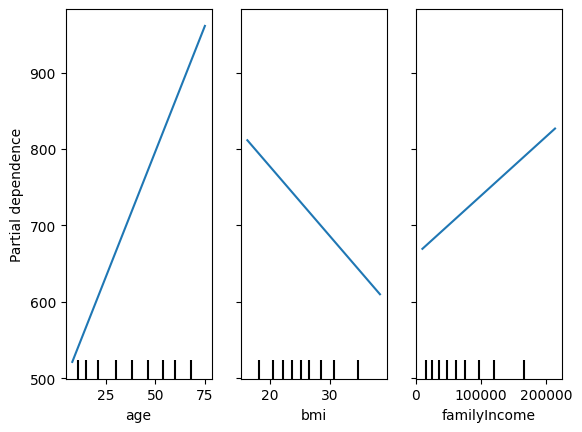

In [9]:
# Chunk 4: PDP plots for age, bmi, income using the OLS model.
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

# While statsmodels gives better summaries for their regression functions, 
    # most of this file uses sklearn because it interfaces with the plots we will be using

from sklearn.linear_model import LinearRegression
mod_ols_v2 = LinearRegression()
ols_v2 = mod_ols_v2.fit(dental_train_X,dental_train["Target"])

# Construct partial dependence plot
PartialDependenceDisplay.from_estimator(mod_ols_v2, X=dental_train_X,  features = ['age','bmi','familyIncome'], grid_resolution=30,kind='average')
plt.show()
plt.close()
# Using kind = "average" produces PDP

# Built-in functions do not work on categorical variables as they do in R, so we will not be viewing occupation


In [ ]:
# Chunk 5: PDP for the GLM
# Statsmodels package has flexible glm options, 
    # even a simple one such as a log link Gaussian GLM but not for PDPs. 
    # sklearn has the code for partial dependence plots but not a wide variety of GLMs, 
    # so at this point making this plot is not possible, besides computing the PDP values directly. 


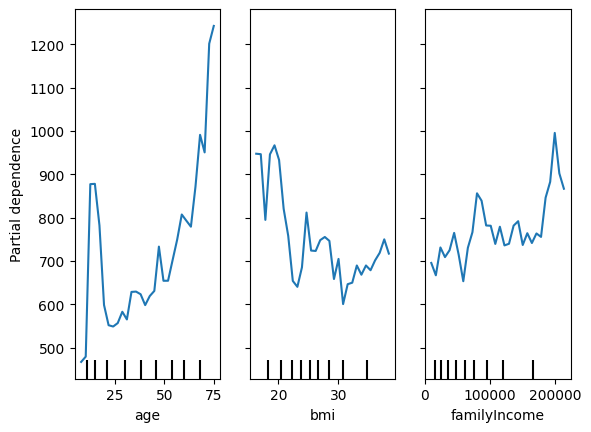

In [10]:
# Chunk 6: PDP for the random forest.
PartialDependenceDisplay.from_estimator(mod_rf, X=dental_train_X,  features = ['age','bmi','familyIncome'], grid_resolution=30,kind='average')
plt.show()
plt.close()


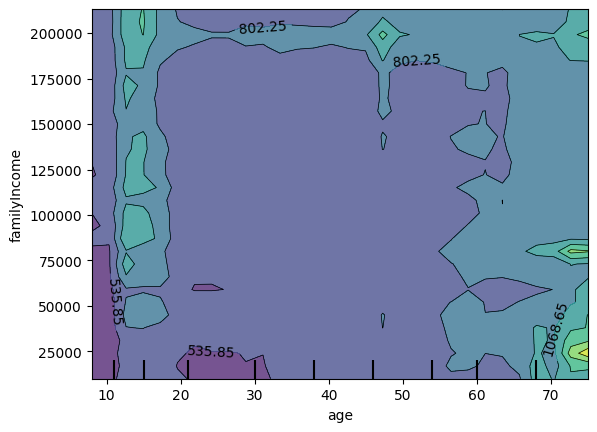

In [11]:
# Chunk 7: A PDP for two variables.
PartialDependenceDisplay.from_estimator(mod_rf, X=dental_train_X,  features = [('age','familyIncome')], grid_resolution=30,kind='average')
plt.show()
plt.close()


In [ ]:
# Chunk 8: Fit a GLM to the predictions of the random forest model.
# Obtain random forest predictions
prediction = rf.predict(dental_train_X)

# Create data sets for surrogate model prediction
dental_train_surrogate = dental_train.copy()
dental_train_surrogate.Target = prediction

# Fit surrogate model
mod_glm_surrogate = smf.glm(formula,data=dental_train_surrogate,family = sm.families.Gaussian(sm.families.links.log()))
glm_surrogate = mod_glm.fit()
glm_surrogate.summary()


In [ ]:
# Chunk 9: ICE plot for age using the OLS model.
from sklearn.inspection import PartialDependenceDisplay
# Requires skklearn version 1.0.0 or higher

PartialDependenceDisplay.from_estimator(mod_ols_v2, X=dental_train_X,  features = ['age'], grid_resolution=30,kind='both',subsample=50,random_state=0,ice_lines_kw={"color": "tab:blue", "alpha": 0.3, "linewidth": 0.5}, pd_line_kw={"color": "tab:orange", "linestyle": "--"})
plt.ylim([0,2000])
plt.show()
plt.close()
# Using kind = "individual" gives ICE only, using kind = "both" gives PDP in the center of the ICE plots 

PartialDependenceDisplay.from_estimator(mod_ols_v2, X=dental_train_X,  features = ['bmi'], grid_resolution=30,kind='both',subsample=50,random_state=0,ice_lines_kw={"color": "tab:blue", "alpha": 0.3, "linewidth": 0.5}, pd_line_kw={"color": "tab:orange", "linestyle": "--"})
plt.ylim([0,2000])
plt.show()
plt.close()

PartialDependenceDisplay.from_estimator(mod_ols_v2, X=dental_train_X,  features = ['familyIncome'], grid_resolution=30,kind='both',subsample=50,random_state=0,ice_lines_kw={"color": "tab:blue", "alpha": 0.3, "linewidth": 0.5}, pd_line_kw={"color": "tab:orange", "linestyle": "--"})
plt.ylim([0,2000])
plt.show()
plt.close()


In [ ]:
# Chunk 10: ICE plot for age using the random forest with only the sampled data. Also set alpha = 0.1 to make the lines more transparent.
PartialDependenceDisplay.from_estimator(mod_rf, X=dental_train_X,  features = ['age'], grid_resolution=30,kind='both',subsample=50,random_state=0,ice_lines_kw={"color": "tab:blue", "alpha": 0.1, "linewidth": 0.5}, pd_line_kw={"color": "tab:orange", "linestyle": "--"})
plt.ylim([0,2000])
plt.show()
plt.close()


In [ ]:
# Chunk 11: Use SHAP to explain the ordinary regression model.
import shap
mod_ols_v2 = LinearRegression()
ols_v2 = mod_ols_v2.fit(dental_train_X.values,dental_train["Target"].values)
shap.initjs() # initializes plotting environment
dental_train_X_km = shap.kmeans(dental_train_X, 10)
explainer = shap.KernelExplainer(mod_ols_v2.predict,dental_train_X_km)
# KernelExplainer works best for non tree models
shap_values = explainer.shap_values(dental_train_X.head(50))
shap.summary_plot(shap_values, dental_train_X.head(50))
plt.close()

# The plot produced show Shapley values for the first 50 observations. The target is color coded. 


In [ ]:
# Chunk 12: Use SHAP to explain a random forest model.
# Explains the first and 13th variable
shap.initjs()
explainer = shap.TreeExplainer(mod_rf,data=dental_train_X)
shap_values = explainer.shap_values(X = dental_train_X.iloc[[0,12],:])
shap.summary_plot(shap_values = shap_values,features = dental_train_X.iloc[[0,12],:])
plt.close()


In [ ]:
# Chunk 13: Reload and prepare the data.
dental = pd.read_csv("dental.csv")
dental_train, dental_test = train_test_split(dental, test_size=0.25)


In [ ]:
# Chunk 14: Fit the model and produce SHAP output and graphs.
# Shapley values are shown for XGBoost
from sklearn.ensemble import GradientBoostingRegressor

mod_xgb = GradientBoostingRegressor(n_estimators=750, learning_rate=0.01,max_depth=4, random_state=0)
xgb = mod_xgb.fit(dental_train_X,dental_train["Target"])

explainer = shap.TreeExplainer(mod_xgb,data=dental_train_X)
shap_values = explainer.shap_values(X = dental_train_X.head(100),check_additivity=False)

# Shapley values are shown for XGBoost
shap.summary_plot(shap_values, dental_train_X.head(100))
plt.close()

# PDP for XGBoost
shap.dependence_plot("age", shap_values, dental_train_X.head(100),interaction_index="bmi")
plt.close()

# These plots are very easy to produce for any model that can be fit in the sklearn library. Sometimes specific packages have their own versions but they are usually specific to certain cases


In [ ]:
# Chunk 15: Set up a new data set with a binary outcome for the target
from sklearn.linear_model import LogisticRegression

dental2 = dental.copy()
dental2.Target = pd.Categorical(dental.Target > 300).astype(int)
dental2_train, dental2_test = train_test_split(dental2, test_size=0.25)

dental2_train_Y, dental2_train_X = patsy.dmatrices(formula, dental2_train, return_type='dataframe')

lr_mod1 = smf.glm(formula,data=dental2_train,family = sm.families.Binomial())
lr1 = lr_mod1.fit()
lr1.summary()

pd.DataFrame(np.abs(lr1.tvalues.drop("Intercept"))).rename(columns={0:'tvalues'}).sort_values('tvalues',ascending=False)[['tvalues']].plot(kind="barh")
plt.title("Logistic Regression Variable Importance")
plt.show()
plt.close()

lr_mod2 = LogisticRegression()
lr2 = lr_mod2.fit(dental2_train_X,dental2_train["Target"])

PartialDependenceDisplay.from_estimator(lr_mod2, X=dental_train_X,  features = ['age'], grid_resolution=30,kind='average')
plt.show()
plt.close()


In [ ]:
# Chunk 16: Calculate predictions for the glm model and plot a lift chart
import scikitplot as skplt

dental2_test_Y, dental2_test_X = patsy.dmatrices(formula, dental2_test, return_type='dataframe')
pred2 = lr_mod2.predict_proba(dental2_test_X)
skplt.metrics.plot_lift_curve(dental2_test_Y,pred2)
plt.show()
plt.close()


In [ ]:
# Chunk 17: Construct a gain chart for the GLM model
skplt.metrics.plot_cumulative_gain(dental2_test_Y,pred2)
plt.show()
plt.close()


In [ ]:
# Chunk 18: Fit a neural network
from sklearn.neural_network import MLPClassifier

nn_mod = MLPClassifier(tol=1e-2,max_iter=10000,hidden_layer_sizes=(10,10),random_state=1,early_stopping=False,n_iter_no_change=1000)
nn = nn_mod.fit(dental2_train_X,dental2_train["Target"])
nn_preds = nn.predict_proba(dental2_test_X)


In [ ]:
# Chunk 19: Construct a gain chart to compare the fit between the GLM model and the neural network
# The legend is not helpful here, the red curve represents gains for the neural net and the orange represents the glm and does not seem customizable for these specific functions
ax = skplt.metrics.plot_cumulative_gain(dental2_test_Y,pred2)
skplt.metrics.plot_cumulative_gain(dental2_test_Y,nn_preds,ax=ax)
plt.show()
plt.close()
